# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.40808672 0.41985142 0.48651809]
  [0.4309318  0.4426965  0.5093632 ]
  [0.46721935 0.47898406 0.5456507 ]
  ...
  [0.62778556 0.6591581  0.7336679 ]
  [0.63562864 0.6670012  0.741511  ]
  [0.6434717  0.67484426 0.74935406]]

 [[0.44234696 0.45411167 0.5207783 ]
  [0.41881388 0.4305786  0.49724525]
  [0.45377326 0.46553797 0.5322046 ]
  ...
  [0.64513135 0.6765039  0.7510137 ]
  [0.6473235  0.67869604 0.75320584]
  [0.6486054  0.67997795 0.75448775]]

 [[0.44897363 0.46073833 0.527405  ]
  [0.41030455 0.42206925 0.48873594]
  [0.46344256 0.47520727 0.541874  ]
  ...
  [0.6574016  0.68877417 0.76328397]
  [0.6487266  0.6800991  0.7546089 ]
  [0.6407468  0.6721193  0.7466291 ]]

 ...

 [[0.5360196  0.55562747 0.63405883]
  [0.5209336  0.54054147 0.6189729 ]
  [0.5244236  0.54403144 0.6224628 ]
  ...
  [0.68650514 0.71787775 0.79238755]
  [0.6970208  0.7283934  0.8029032 ]
  [0.70235115 0.7337237  0.8082335 ]]

 [[0.4934142  0.51302207 0.59145343]
  [0.48832914 0.507937   0.5863684 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5405277  0.4777826  0.52091986]
  [0.537741   0.4749959  0.51813316]
  [0.5349543  0.47220922 0.51534647]
  ...
  [0.58658403 0.5395252  0.5787409 ]
  [0.5803922  0.53333336 0.57254905]
  [0.5821702  0.53511137 0.57432705]]

 [[0.551203   0.48845792 0.5315952 ]
  [0.5506457  0.48790058 0.53103787]
  [0.55008835 0.48734322 0.5304805 ]
  ...
  [0.584912   0.5378532  0.57706887]
  [0.5803922  0.53333336 0.57254905]
  [0.5827275  0.5356687  0.57488436]]

 [[0.54436696 0.48162183 0.5247591 ]
  [0.5465963  0.4838512  0.52698845]
  [0.5488256  0.48608056 0.5292178 ]
  ...
  [0.58324003 0.5361812  0.5753969 ]
  [0.5803922  0.53333336 0.57254905]
  [0.58328485 0.53622603 0.5754417 ]]

 ...

 [[0.50587004 0.45488966 0.49410534]
  [0.509758   0.45877758 0.49799326]
  [0.5059682  0.45498776 0.49420345]
  ...
  [0.5413419  0.5138909  0.5413419 ]
  [0.54627174 0.51882076 0.54627174]
  [0.5535171  0.5260661  0.5535171 ]]

 [[0.50643355 0.45545316 0.49466884]
  [0.5092926  0.4583122  0.4975279 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [71]:
1506/32

47.0625

In [72]:
215/32

6.71875

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 19s 353ms/step - loss: 0.9230 - accuracy: 0.4620 - val_loss: 0.8620 - val_accuracy: 0.4635
Epoch 2/20
47/47 [==============================] - 17s 352ms/step - loss: 0.7242 - accuracy: 0.6832 - val_loss: 0.5449 - val_accuracy: 0.7656
Epoch 3/20
47/47 [==============================] - 17s 352ms/step - loss: 0.4783 - accuracy: 0.8019 - val_loss: 0.3428 - val_accuracy: 0.8594
Epoch 4/20
47/47 [==============================] - 16s 349ms/step - loss: 0.2931 - accuracy: 0.8874 - val_loss: 0.4933 - val_accuracy: 0.7969
Epoch 5/20
47/47 [==============================] - 16s 349ms/step - loss: 0.5106 - accuracy: 0.8114 - val_loss: 0.5173 - val_accuracy: 0.8073
Epoch 6/20
47/47 [==============================] - 16s 350ms/step - loss: 0.3533 - accuracy: 0.8521 - val_loss: 0.4113 - val_accuracy: 0.8333
Epoch 7/20
47/47 [==============================] - 16s 350ms/step - loss: 0.2590 - accuracy: 0.8948 - val_loss: 0.2158 - val_accuracy: 0.8906

In [14]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 4s 309ms/step - loss: 0.0768 - accuracy: 0.9745


In [15]:
scores

[0.07676056027412415, 0.9744779467582703]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [16]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [17]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [19]:
type(history.history['loss'])

list

In [20]:
len(history.history['loss'])

20

In [21]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9230136275291443,
 0.7241908311843872,
 0.47826799750328064,
 0.29314613342285156,
 0.5106303691864014]

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
val_acc

[0.4635416567325592,
 0.765625,
 0.859375,
 0.796875,
 0.8072916865348816,
 0.8333333134651184,
 0.890625,
 0.8854166865348816,
 0.9427083134651184,
 0.9270833134651184,
 0.875,
 0.96875,
 0.953125,
 0.9635416865348816,
 0.9635416865348816,
 0.9583333134651184,
 0.984375,
 0.8802083134651184,
 0.9583333134651184,
 0.9583333134651184]

In [24]:
acc

[0.46200814843177795,
 0.6831750273704529,
 0.8018996119499207,
 0.8873812556266785,
 0.8113975524902344,
 0.8521031141281128,
 0.8948439359664917,
 0.9151967167854309,
 0.9151967167854309,
 0.9335142374038696,
 0.9402984976768494,
 0.9518317580223083,
 0.9708276987075806,
 0.9579375982284546,
 0.9626865386962891,
 0.9464043378829956,
 0.974219799041748,
 0.9599728584289551,
 0.9538670182228088,
 0.9715061187744141]

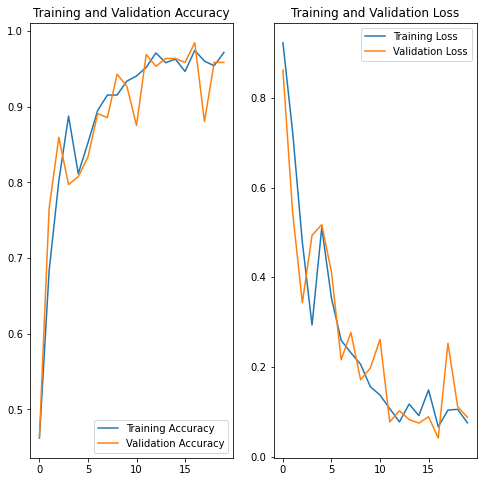

In [25]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___healthy
predicted label: Potato___Late_blight


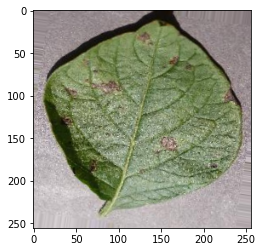

In [29]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

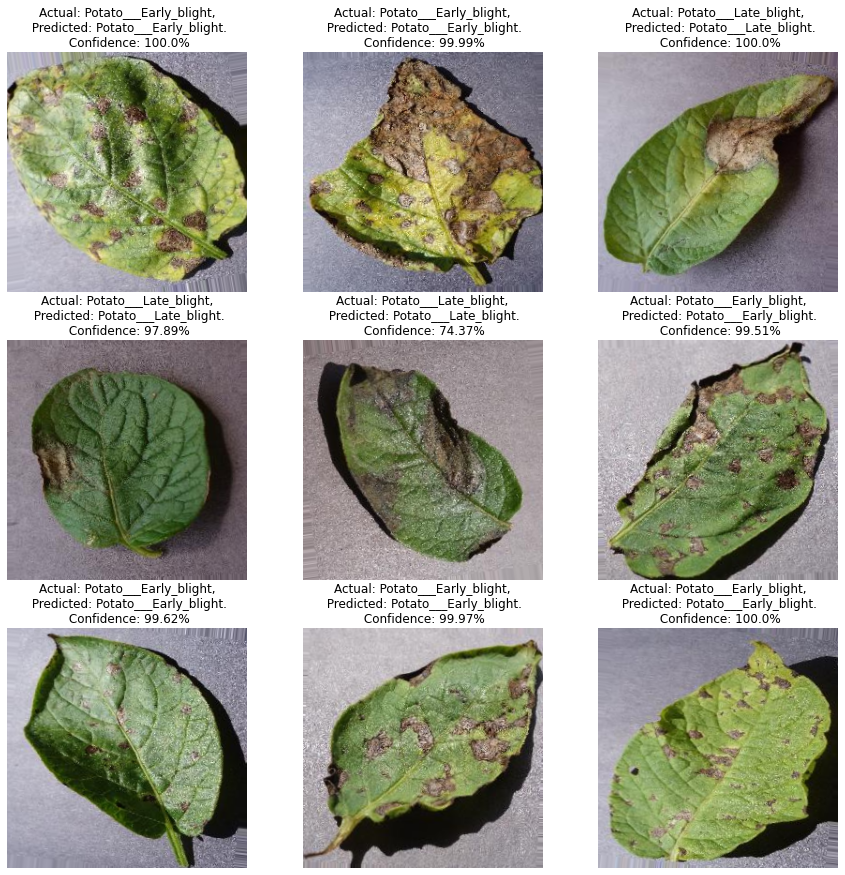

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [34]:
model.save("../potatoes.h5")